In [243]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [244]:
pd.set_option('display.max_columns', 24)

In [245]:
data = pd.read_csv("data/Dataset_PS2.csv")
data.head(5)

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,NaN,NaN,1.407011,314.373913,57.257470,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.346095,40519.173105,NaN,NaN,57298148.0,35603420.0,NaN,2458000.5,1.107776,136.717242,NaN,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,4.557,2458000.5,1.458824,259.475979,248.415038,1.966857,2.458120e+06,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,NaN,NaN,NaN,26522368.0,5.093,2458000.5,NaN,57.173266,NaN,1.527904,2.457902e+06,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,158.646713,61010824.0,NaN,5.154,NaN,1.225615,84.629307,158.263596,NaN,2.457814e+06,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


In [246]:
data.apply(pd.isna,axis=0).apply(pd.Series.sum)

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

In [247]:
cond_check = data.iloc[0]
cond_check = cond_check.fillna("empty")
print(cond_check)
cond_check[cond_check == "empty"].index.map(lambda x: x in ["approach_year","approach_month","approach_day"])

Name                                   3703080
Epoch Date Close Approach       788947200000.0
Relative Velocity km per sec         Very Slow
Relative Velocity km per hr       22017.003799
Miles per hour                    13680.509944
Miss Dist.(Astronomical)              0.419483
Miss Dist.(lunar)                   163.178711
Miss Dist.(kilometers)              62753692.0
Miss Dist.(miles)                   38993336.0
Jupiter Tisserand Invariant              empty
Epoch Osculation                         empty
Semi Major Axis                       1.407011
Asc Node Longitude                  314.373913
Perihelion Arg                        57.25747
Aphelion Dist                         2.005764
Perihelion Time                          empty
Mean Anomaly                        264.837533
Mean Motion                           0.590551
approach_year                            empty
approach_month                             1.0
approach_day                               1.0
Orbital Perio

Index([False, False, False, True], dtype='bool')

In [248]:
def fillApproachDate(data: pd.Series):
    cond_check = data
    cond_check = cond_check.fillna("empty")
    contains_epoch = not cond_check['Epoch Date Close Approach'] == "empty"
    contains_date = not cond_check[cond_check == "empty"].index.map(lambda x: x in ["approach_year","approach_month","approach_day"]).any()
    if(contains_epoch and not contains_date):
        actual_date = datetime.datetime.fromtimestamp(data['Epoch Date Close Approach'] / 1000)
        data.approach_day = actual_date.day
        data.approach_month = actual_date.month
        data.approach_year = actual_date.year
    elif(contains_date and not contains_epoch):
        actual_date = datetime.datetime(int(data.approach_year),int(data.approach_month),int(data.approach_day),0,0,0)
        data['Epoch Date Close Approach'] = int(actual_date.timestamp()) * 1000
    return data

In [249]:
def classifyRelVel(data:pd.Series,very_slow_min, slow_min,fast_min):
    if(pd.isna(data['Relative Velocity km per sec']) and not pd.isna(data['Relative Velocity km per hr'])):
        if(data['Relative Velocity km per hr'] < very_slow_min):
            data['Relative Velocity km per sec'] = "Very Slow"
        elif(data['Relative Velocity km per hr'] < slow_min):
            data['Relative Velocity km per sec'] = "Slow"
        elif(data['Relative Velocity km per hr'] < fast_min):
            data['Relative Velocity km per sec'] = "Fast"
        else:
            data['Relative Velocity km per sec'] = "Very Fast"
    return data


In [250]:
data = data.apply(fillApproachDate,axis=1)
data.head(5)
data['Relative Velocity km per hr'].info()
data['Relative Velocity km per sec'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 4534 entries, 0 to 4533
Series name: Relative Velocity km per hr
Non-Null Count  Dtype  
--------------  -----  
3033 non-null   float64
dtypes: float64(1)
memory usage: 35.6 KB


Relative Velocity km per sec
Slow         1455
Very Slow    1319
Fast          353
Very Fast      57
Name: count, dtype: int64

In [251]:
cat_filt = data.groupby('Relative Velocity km per sec')
very_slow_min = cat_filt.get_group('Very Slow')['Relative Velocity km per hr'].min()
slow_min = cat_filt.get_group('Slow')['Relative Velocity km per hr'].min()
fast_min = cat_filt.get_group('Very Fast')['Relative Velocity km per hr'].min()

In [252]:
data['Relative Velocity km per sec'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4534 entries, 0 to 4533
Series name: Relative Velocity km per sec
Non-Null Count  Dtype 
--------------  ----- 
3184 non-null   object
dtypes: object(1)
memory usage: 35.6+ KB


In [253]:
data = data.apply(lambda x: classifyRelVel(x,very_slow_min,slow_min,fast_min), axis=1)

In [254]:
data['Miss Dist.(Astronomical)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4534 entries, 0 to 4533
Series name: Miss Dist.(Astronomical)
Non-Null Count  Dtype  
--------------  -----  
3933 non-null   float64
dtypes: float64(1)
memory usage: 35.6 KB


In [255]:
data.iloc[0,0]

np.int64(3703080)

In [256]:
data['Miss Dist.(kilometers)'] = data['Miss Dist.(miles)'] * 1.609344
print(data[data['Miss Dist.(kilometers)'].isna()]['Miss Dist.(lunar)'])
current = data['Miss Dist.(kilometers)'].isna()
data.loc[current, 'Miss Dist.(kilometers)'] = data[current]['Miss Dist.(lunar)'] * 384400
current = data['Miss Dist.(kilometers)'].isna()
data.loc[current,'Miss Dist.(kilometers)'] = data[current]['Miss Dist.(Astronomical)'] * 149597700.02598438
current = data['Miss Dist.(Astronomical)'].isna()
data.loc[current,'Miss Dist.(Astronomical)'] = data[current]['Miss Dist.(kilometers)'] / 149597700.02598438
data['Miss Dist.(Astronomical)'].count()
data = data.drop(columns=['Miss Dist.(kilometers)','Miss Dist.(lunar)','Miss Dist.(miles)'])

4       158.646713
7        50.250694
8              NaN
11      167.665054
22       18.882595
           ...    
4488    173.977036
4493           NaN
4503     98.726303
4524     15.566989
4529           NaN
Name: Miss Dist.(lunar), Length: 652, dtype: float64


In [257]:
data.apply(pd.isna,axis=0).apply(pd.Series.sum)

Name                               0
Epoch Date Close Approach        644
Relative Velocity km per sec     455
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)          32
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    205
approach_month                   428
approach_day                     163
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

In [258]:
data[data['Mean Motion'].notna() & data['Semi Major Axis'].notna()][['Semi Major Axis','Mean Motion']].loc[0]

Semi Major Axis    1.407011
Mean Motion        0.590551
Name: 0, dtype: float64

In [259]:
def fillMeanMotion(data: pd.DataFrame):
    constant_data = data[data['Mean Motion'].notna() & data['Semi Major Axis'].notna()][['Semi Major Axis','Mean Motion']].loc[0]
    constant_mul = constant_data['Mean Motion'] * (constant_data['Semi Major Axis'] ** (3/2))
    data['Mean Motion'] = constant_mul / (data['Semi Major Axis'] ** (3/2))
    return data

In [260]:
data.head(5)

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,NaN,NaN,1.407011,314.373913,57.257470,2.005764,NaN,264.837533,0.590551,1995.0,1.0,1.0,Low,Medium,True
1,3723955,7.888986e+11,Slow,65210.346095,40519.173105,0.383015,NaN,2458000.5,1.107776,136.717242,NaN,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,Slow,27326.560182,16979.661798,0.050956,4.557,2458000.5,1.458824,259.475979,248.415038,1.966857,2.458120e+06,NaN,NaN,1995.0,1.0,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,0.285323,5.093,2458000.5,NaN,57.173266,NaN,1.527904,2.457902e+06,68.741007,0.700277,1995.0,1.0,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,5.154,NaN,1.225615,84.629307,158.263596,NaN,2.457814e+06,NaN,NaN,1995.0,1.0,15.0,NaN,Low,True


<Axes: >

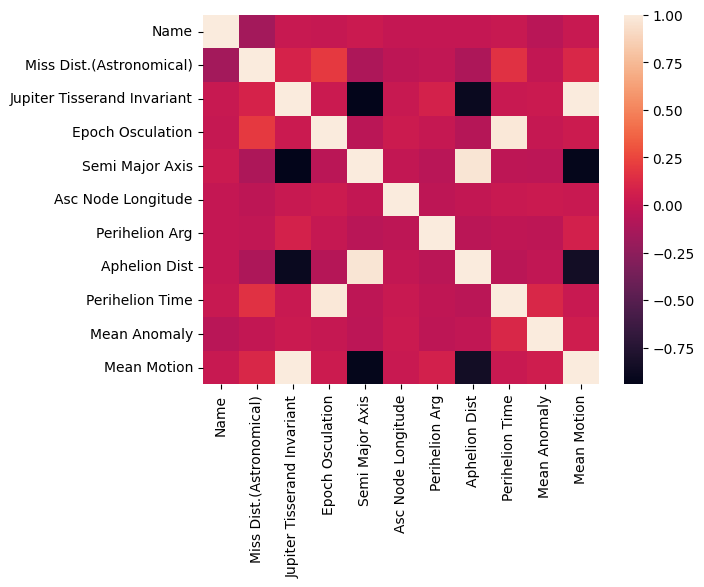

In [261]:
sns.heatmap(data.select_dtypes(exclude=['object','bool']).drop(columns=['Epoch Date Close Approach','Relative Velocity km per hr', 'Miles per hour', 'approach_day','approach_year','approach_month']).corr())

<Axes: xlabel='Mean Motion', ylabel='Semi Major Axis'>

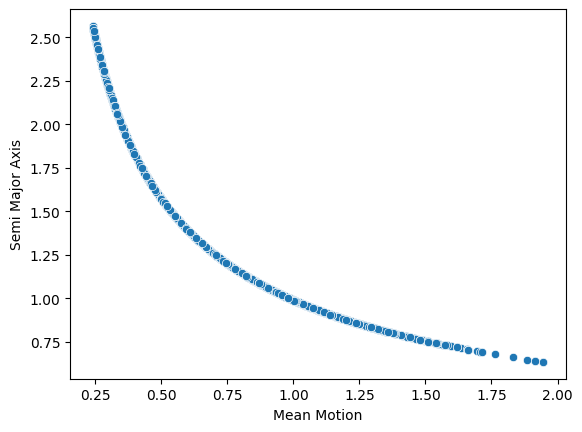

In [262]:
sns.scatterplot(data,x='Mean Motion', y="Semi Major Axis")

In [263]:
new_data = fillMeanMotion(data)
new_data.apply(pd.isna,axis=0).apply(pd.Series.sum)

Name                               0
Epoch Date Close Approach        644
Relative Velocity km per sec     455
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)          32
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1188
approach_year                    205
approach_month                   428
approach_day                     163
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

<Axes: xlabel='Mean Motion', ylabel='Semi Major Axis'>

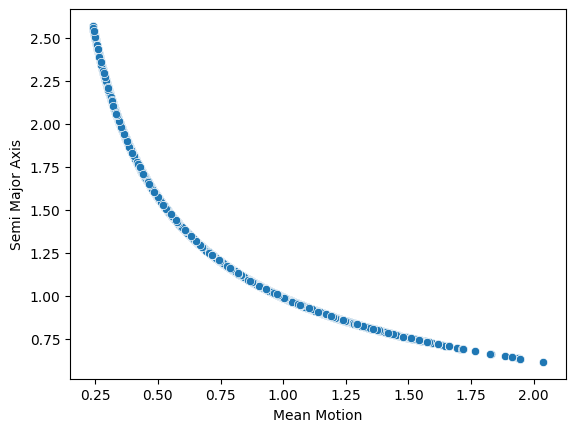

In [264]:
sns.scatterplot(new_data,x='Mean Motion', y="Semi Major Axis")
